In [39]:
##Conexion al BD 
library(odbc)
library(glue)
library(sqldf)
library(dplyr)
library(ggplot2)


con <- dbConnect(odbc(),
                   Driver = "SQLServer",
                 Server = "54.245.36.29",
                 Database = "ocesa_dwh",
                 UID = "ocesa_da",
                 PWD = "P4ssw0rd3",
                 Port = 1433)

In [8]:


x1<-dbListTables(con)

Fac_ledger <- tbl(con,"fact_sap_ledger") 

In [9]:
Fac_ledger #Visualización de los datos

# Source:   table<fact_sap_ledger> [?? x 22]
# Database: Microsoft SQL Server 13.00.4001[ocesa_da@EC2AMAZ-9QPUDBP/ocesa_dwh]
   acreedor_pk ceco_pk cuenta_pk deudor_pk division_pk pep_pk socgla_pk
         <int>   <int>     <int>     <int>       <int>  <int>     <int>
 1        4152       0       594         0          20      0         0
 2        4152       0       594         0          20      0         0
 3        4152       0       594         0          20      0         0
 4        4152       0       594         0          20      0         0
 5        4152       0       594         0          20      0         0
 6        4152       0       594         0          20      0         0
 7        4152       0       594         0          20      0         0
 8        4152       0       594         0          20      0         0
 9        4152       0       594         0          20      0         0
10        4152       0       594         0          20      0         0
# ... with 

In [17]:
#Join con cuentas deudor. deudor
dim_cuenta <-tbl(con,"dim_cuenta")
dim_deudor <-tbl(con,"dim_deudor") 
dim_pep    <-tbl(con,"dim_pep")
cuentabd   <- left_join(Fac_ledger,dim_cuenta)
deudorbd   <-left_join(cuentabd,dim_deudor)
pepbd      <-left_join(deudorbd,dim_pep)


Joining, by = "cuenta_pk"
Joining, by = "deudor_pk"
Joining, by = c("division_pk", "pep_pk", "sociedad_pk")


In [23]:
##agrupación por pep(Evento_descriptivo)
pepbd

# Source:   lazy query [?? x 38]
# Database: Microsoft SQL Server 13.00.4001[ocesa_da@EC2AMAZ-9QPUDBP/ocesa_dwh]
   acreedor_pk ceco_pk cuenta_pk deudor_pk division_pk pep_pk socgla_pk
         <int>   <int>     <int>     <int>       <int>  <int>     <int>
 1        4152       0       594         0          20      0         0
 2        4152       0       594         0          20      0         0
 3        4152       0       594         0          20      0         0
 4        4152       0       594         0          20      0         0
 5        4152       0       594         0          20      0         0
 6        4152       0       594         0          20      0         0
 7        4152       0       594         0          20      0         0
 8        4152       0       594         0          20      0         0
 9        4152       0       594         0          20      0         0
10        4152       0       594         0          20      0         0
# ... with more rows, a

In [27]:
 anio_pep<-pepbd%>%group_by(pep_anio)%>% summarise(monto=sum(monto_divisa))

In [28]:
anio_pep

Warning message:
“Missing values are always removed in SQL.
Use `SUM(x, na.rm = TRUE)` to silence this warning”

# Source:   lazy query [?? x 2]
# Database: Microsoft SQL Server 13.00.4001[ocesa_da@EC2AMAZ-9QPUDBP/ocesa_dwh]
   pep_anio        monto
      <int>        <dbl>
 1        0 -1107096739.
 2     2013   -11642014.
 3     2008           0.
 4       NA  3179070125.
 5     2018   455159573.
 6     2012   -60400351.
 7     2016 -1159518960.
 8     2011   -16297470.
 9     2009   -14132550.
10     2017  -864021131.
# ... with more rows

In [40]:
resut_anio<-as.data.frame(anio_pep)

Warning message:
“Missing values are always removed in SQL.
Use `SUM(x, na.rm = TRUE)` to silence this warning”

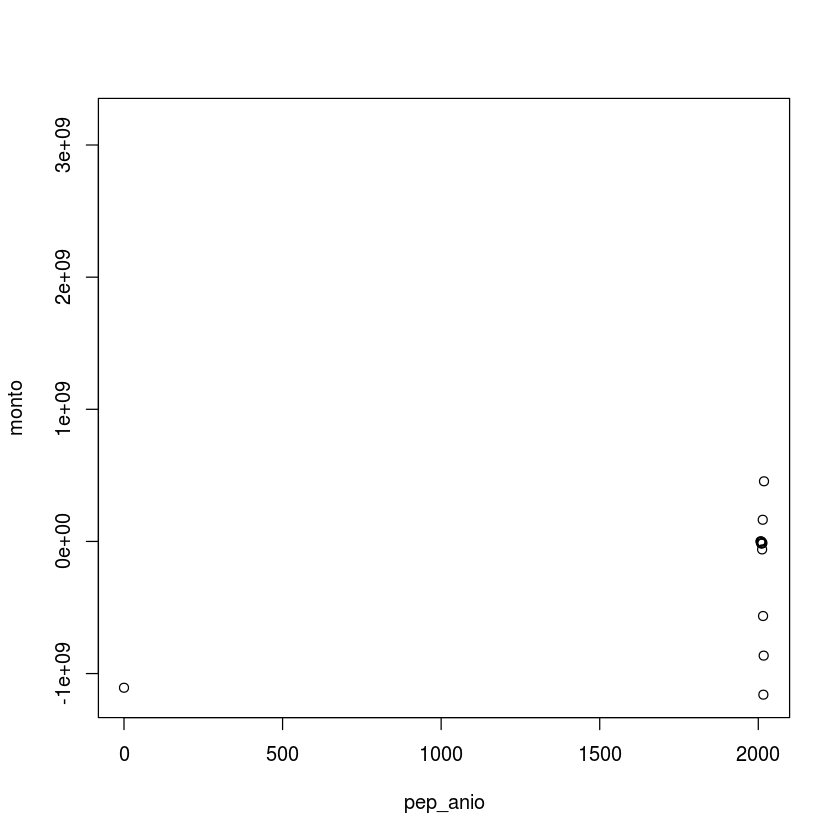

In [41]:
plot(resut_anio)